## 1. load Packages

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
from matplotlib import rcParams

## 2. params

In [2]:
os.chdir("D:/Projects/CASH-Human/")
dir_for_ldata_Myeloid = "./data/loom/ldata_sub/Myeloid_ldata.h5ad"

## setup
scv.settings.verbosity = 0
sc.settings.verbosity = 0

# color panel
Subset_color_panel = {
    "c01_ Monocyte_CD14CD16": "#5A7B8F",
    "c02_ Monocyte_CD14": "#3D806F",
    "c03_ Monocyte_CD16": "#BC3C29",
    "c04_ Monocyte_CD14": "#9FAFA3",
    "c05_ Macrophage_": "#F37C95",
    "c06_ Macrophage_": "#A08634",
    "c07_ Macrophage_ MARCO": "#7D4E57",
    "c08_ cDC1": "#608541",
    "c09_cDC2": "#EE4C97",
    "c10_cDC2": "#958056",
    "c11_cDC2": "#6F99AD",
    "c12_pDC": "#0072B5",
    "c13_Actived_DC": "#CFC59A"
}

### fig
sc.settings.set_figure_params(dpi = 100, dpi_save = 100, fontsize = 14, frameon = True,figsize = (5,5))
scv.settings.set_figure_params(dpi = 100, dpi_save = 100, fontsize = 14, frameon = None, figsize = (5,5)) 

## 3. load data

In [3]:
## load data
ldata = scv.read(os.path.join(dir_for_ldata_Myeloid))
print("ldata:\n", ldata)
print("ldata_clusters:\n", pd.unique(ldata.obs["sub_celltype"]))

ldata:
 AnnData object with n_obs × n_vars = 3622 × 37487
    obs: 'patient', 'barcode', 'group', 'patient_id', 'sub_celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
ldata_clusters:
 ['c02_ Monocyte_CD14', 'c05_ Macrophage_', 'c01_ Monocyte_CD14CD16', 'c07_ Macrophage_ MARCO', 'c13_Actived_DC', ..., 'c09_cDC2', 'c10_cDC2', 'c08_ cDC1', 'c12_pDC', 'c11_cDC2']
Length: 13
Categories (13, object): ['c01_ Monocyte_CD14CD16', 'c02_ Monocyte_CD14', 'c03_ Monocyte_CD16', 'c04_ Monocyte_CD14', ..., 'c10_cDC2', 'c11_cDC2', 'c12_pDC', 'c13_Actived_DC']


In [4]:
## preprocess
sc.pp.pca(ldata)
sc.pp.neighbors(ldata, n_pcs = 50, n_neighbors = 30)

# sc.pl.umap(ldata, 
#            color = "sub_celltype", 
#            palette = Subset_color_panel,
#            title = "",
#            frameon = False, 
#            legend_loc = "right margin")


In [5]:
## compute
scv.pp.filter_and_normalize(ldata)
scv.pp.moments(ldata)

scv.tl.velocity(ldata, group_by = 'sub_celltype')
scv.tl.velocity_graph(ldata)

d:\software\anaconda3\Lib\site-packages\scvelo\preprocessing\utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
d:\software\anaconda3\Lib\site-packages\scvelo\tools\optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


  0%|          | 0/3622 [00:00<?, ?cells/s]

d:\software\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:60: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categor

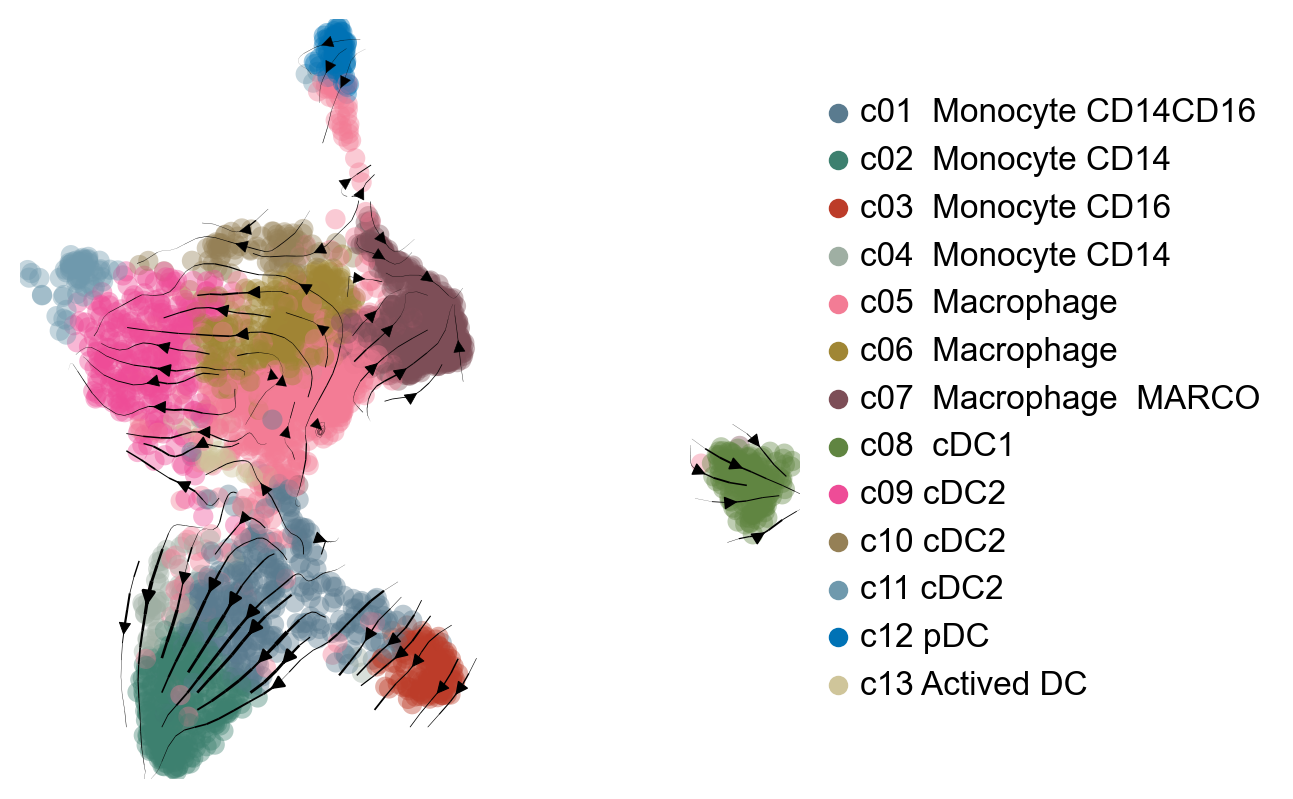

In [6]:
## plot
scv.pl.velocity_embedding_stream(ldata, 
                                 basis = "X_umap", 
                                 color = "sub_celltype",
                                 palette = Subset_color_panel,
                                 title = "",
                                 ## legend
                                 legend_fontsize=12,
                                 legend_loc = "right margin",
                                 
                                 ## save
                                 save = "./fig/Fig02.Myeloid/Fig2E.scVelocity_Myeloid.pdf",
                                 density = 1.5, alpha = 0.4, linewidth = 0.8)